## **Import libraries**

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import *
                                    
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

## **Download the dataset**

Download the datasets from the below links.

https://drive.google.com/file/d/1-16czyoJl7r_Z09NuJ06wPaPkVCsffk7/view?usp=sharing

https://drive.google.com/file/d/1-H6FuinqOeGFVCEvoJAGSMw7V_wa3Lhf/view?usp=sharing

First link is without preprocessing, but the second link has been preprocessed.

The below link would be helpful.

https://www.kaggle.com/valentynsichkar/traffic-signs-preprocessed


In [ ]:
# Downloading data
!gdown --id 1-16czyoJl7r_Z09NuJ06wPaPkVCsffk7
!gdown --id 1-H6FuinqOeGFVCEvoJAGSMw7V_wa3Lhf

In [3]:
def read_data(file_path):
  with open(file_path,'rb') as f:
    data = pickle.load(f, encoding='latin1')
    data['x_train'] = np.transpose(data['x_train'],(0,2,3,1))
    data['x_validation'] = np.transpose(data['x_validation'],(0,2,3,1))
    data['x_test'] = np.transpose(data['x_test'],(0,2,3,1))
    return data

In [ ]:
data = read_data('data0.pickle')
data.keys()

## **Display the dataset**

Plot some samples from the first dataset to see and know what are you working with. 

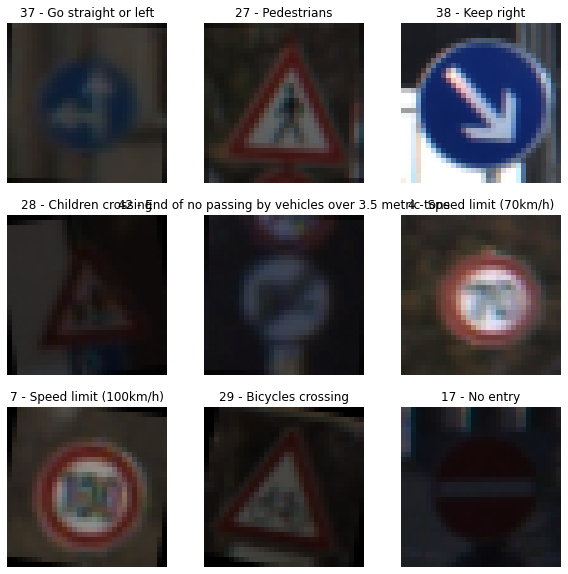

In [5]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(data['x_train'][i].astype("uint8"))
    plt.title(f"{int(data['y_train'][i])} - {data['labels'][int(data['y_train'][i])]}")
    plt.axis("off")

## **Build the ResNet Model**

Model's architecutre is given in the below tables. By entering each stage (except the first stage), the number of filters is doubled and the spatial resolution is halved.

<center>
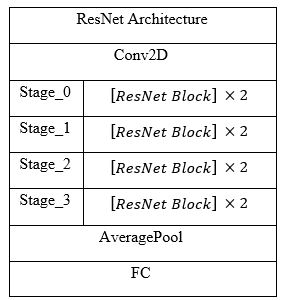
</center>
<h3><center> Model's architecture </center></h3>

<center>
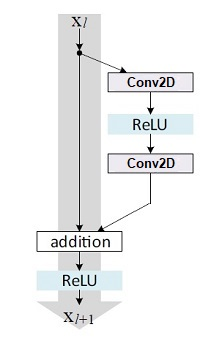
</center>

<h3><center> ResNet block architecture </center><h3>

In [6]:
def residual_block(x,filters,kernel_size,down_sample=False):
  y = Conv2D(filters=filters,kernel_size=kernel_size,strides=(1 if not down_sample else 2),padding='same',activation='relu')(x)
  y = Conv2D(filters=filters,kernel_size=kernel_size,padding='same')(y)
  if down_sample:
    x = Conv2D(filters=filters,kernel_size=1,strides=2,padding='same')(x)
  xy = Add()([x,y])
  out = Activation('relu')(xy)
  return out  


In [ ]:
image_size = data['x_train'].shape[1:]
output_size = len(data['labels'])
inputs = Input(shape=image_size)

x = Conv2D(filters=32,kernel_size=(3,3),activation='relu')(inputs)

x = residual_block(x,32,(3,3))
x = residual_block(x,32,(3,3))

x = residual_block(x,32,(3,3))
x = residual_block(x,64,(3,3),down_sample=True)

x = residual_block(x,64,(3,3))
x = residual_block(x,64,(3,3))

x = residual_block(x,64,(3,3))
x = residual_block(x,128,(3,3),down_sample=True)

x = MaxPool2D()(x)
x = Flatten()(x)
output = Dense(units=output_size,activation='softmax')(x)

model = Model(inputs=inputs,outputs=output)
model.summary()

## **Plot the model**

Use the imported util to visualize the model.

In [ ]:
plot_model(model,show_layer_names=False,dpi=60)

## **Train the model**

Train the model on the second dataset (preprocessed)

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
data = read_data('data3.pickle')
x_train = data['x_train']
x_val = data['x_validation']
x_test = data['x_test']
y_train = tf.keras.utils.to_categorical(data['y_train'])
y_val = tf.keras.utils.to_categorical(data['y_validation'])
y_test = data['y_test']

In [ ]:
history = model.fit(x=x_train,y=y_train,epochs=7, batch_size=64,validation_data=(x_val,y_val))

## **Test the model**

In [12]:
y_pred = np.argmax(model.predict(x_test),axis=1)
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_test,y_pred)
metric.result().numpy()

0.9515439

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

In [ ]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
ax.plot(history.history['loss'],label='train')
ax.plot(history.history['val_loss'], label='validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
ax.legend()
ax = plt.subplot(1, 2, 2)
ax.plot(history.history['accuracy'],label='train')
ax.plot(history.history['val_accuracy'], label='validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')
ax.legend()